In [3]:
import pandas as pd
import matplotlib.pyplot as plt
backbone = "MobileFaceNet" #
device =  "cpu"#"cuda:0"#
exit_type = "Dense2LayerTemp"#"Dense2Layer"#"ConvDense"#
# exits_path = f"./out_dir/{backbone}/exits_{device}.csv"
# model_path = f"./out_dir/{backbone}/model_{device}.csv"
trial = "mttrs"
report_dir = f"./out_dir/{backbone}/reports/{exit_type}/{device}/{trial}"
exits_path = f"{report_dir}/exits.csv"


exits_df = pd.read_csv(exits_path, index_col="Idx")

exits_df.reset_index(inplace=True)


exits_df.drop_duplicates(subset=["Confidence", "ExitNumber"], inplace=True, ignore_index=True)

exits_df = exits_df[exits_df['HitRate'] != -1]
exits_df[(exits_df["ExitNumber"]==1)]


,Idx,Confidence,ExitNumber,ExitName,HitTime,HitRateOverAll,HitRate,Accuracy,CacheAccuracy,SamplesReached,BatchesReached
1,1,0.00,1,5,76.85,100.00,100.00,94.27,94.30,3998,125.0
5,5,0.02,1,5,75.53,100.00,100.00,94.37,94.40,3998,125.0
9,9,0.04,1,5,75.67,99.97,99.97,94.20,94.22,3998,125.0
13,13,0.06,1,5,75.37,99.52,99.52,94.50,94.52,3998,125.0
17,17,0.08,1,5,75.29,98.27,98.27,95.52,95.55,3998,125.0
21,21,0.10,1,5,75.75,96.80,96.80,96.41,96.43,3998,125.0
25,25,0.12,1,5,77.12,95.07,95.07,97.13,97.13,3998,125.0
29,29,0.14,1,5,76.77,93.52,93.52,97.78,97.78,3998,125.0
33,33,0.16,1,5,77.06,91.77,91.77,98.15,98.15,3998,125.0
37,37,0.18,1,5,76.84,89.77,89.77,98.72,98.72,3998,125.0


In [7]:
model_path = f"{report_dir}/model.csv"
model_df = pd.read_csv(model_path, index_col="Idx")
model_df.reset_index(inplace=True)
model_df.drop_duplicates(subset=["Confidence"], inplace=True, ignore_index=True)

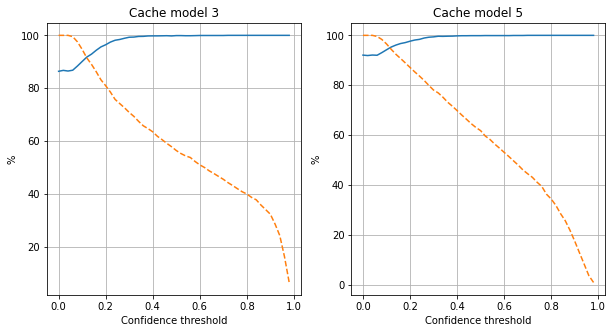

In [11]:
fig, axs = plt.subplots(1, 2 ,figsize=(10,5))
# axs = [axs]
for i in range(2):
    axs[i].title.set_text(f"Cache model {exits_df[exits_df['ExitNumber'] == i]['ExitName'].iloc[0]}")
    axs[i].grid()
    # cum_hr = exits_df[exits_df["ExitNumber"]==i]["HitRateOverAll"].reset_index()
    # for j in range(i):
    #     cum_hr += exits_df[exits_df["ExitNumber"]==j]["HitRateOverAll"].reset_index()
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["CacheAccuracy"], label="Cache Acc")
    # axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["HitRateOverAll"], label="HR_OV")
    # axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], cum_hr["HitRateOverAll"], label="CUM_HR")
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["HitRate"], '--', label="Hitrate")
    axs[i].set_xlabel("Confidence threshold")
    axs[i].set_ylabel("%")
handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right')



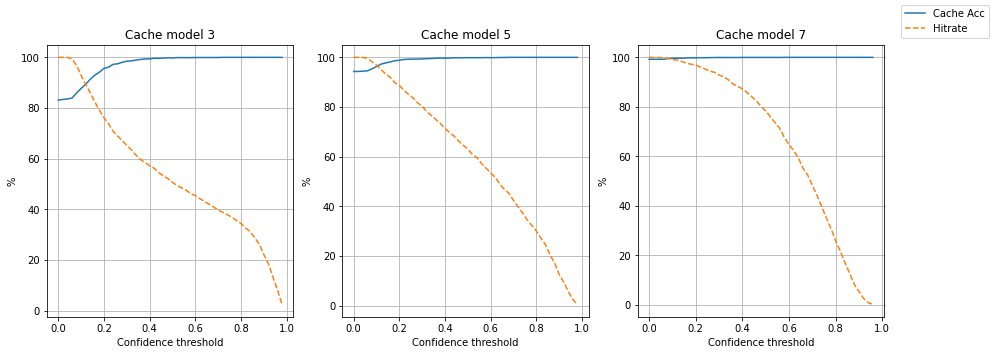

In [8]:
fig, axs = plt.subplots(1, 3 ,figsize=(15,5))
# axs = [axs]
# plt.xlim([0, 1])
# plt.ylim([0, 101])
for i in range(3):
    axs[i].title.set_text(f"Cache model {exits_df[exits_df['ExitNumber'] == i]['ExitName'].iloc[0]}")
    axs[i].grid()
    # cum_hr = exits_df[exits_df["ExitNumber"]==i]["HitRateOverAll"].reset_index()
    # for j in range(i):
    #     cum_hr += exits_df[exits_df["ExitNumber"]==j]["HitRateOverAll"].reset_index()
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["CacheAccuracy"], label="Cache Acc")
    # axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["HitRateOverAll"], label="HR_OV")
    # axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], cum_hr["HitRateOverAll"], label="CUM_HR")
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["HitRate"], '--', label="Hitrate")
    axs[i].set_xlabel("Confidence threshold")
    axs[i].set_ylabel("%")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')



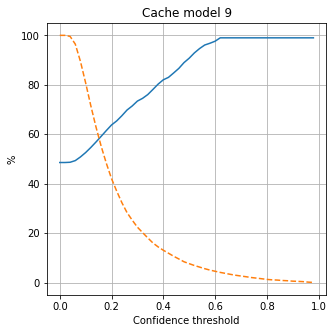

In [55]:
### AlexNet
fig, axs = plt.subplots(1,figsize=(5,5))
axs = [axs]
df = exits_df.copy()
df["CacheAccuracy"] += 20
df["HitRate"] += 20
df.loc[(df["CacheAccuracy"] > 99), "CacheAccuracy"] = 99
for i in range(1):
    axs[i].title.set_text(f"Cache model 9")
    axs[i].grid()
    # cum_hr = exits_df[exits_df["ExitNumber"]==i]["HitRateOverAll"].reset_index()
    # for j in range(i):
    #     cum_hr += exits_df[exits_df["ExitNumber"]==j]["HitRateOverAll"].reset_index()
    
    axs[i].plot(df[df["ExitNumber"] == i]["Confidence"], df[df["ExitNumber"]==i]["CacheAccuracy"], label="Cache Acc")
    # axs[i].plot(df[df["ExitNumber"] == i]["Confidence"], df[df["ExitNumber"]==i]["HitRateOverAll"], label="HR_OV")
    # axs[i].plot(df[df["ExitNumber"] == i]["Confidence"], cum_hr["HitRateOverAll"], label="CUM_HR")
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["HitRate"], '--', label="Hitrate")
    # axs[i].plot(df[df["ExitNumber"] == i]["Confidence"], [1.047**(i) for i in range(100, 0, -2)], '--', label="Hitrate")
    axs[i].set_xlabel("Confidence threshold")
    axs[i].set_ylabel("%")
handles, labels = axs[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right')

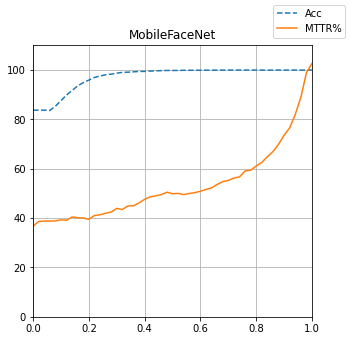

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title(backbone)
ax.set_ylim([0, 110])
ax.set_xlim([0, 1])
# ax.plot(model_df["Confidence"], model_df["CacheAccuracy"], label="CacheAcc")
ax.plot(model_df["Confidence"], model_df["CachedAccuracy"], "--", label="Acc")
ax.plot(model_df["Confidence"], model_df["MTTRRatio"], label="MTTR%")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
# ax.set_yticks(range(0, 120, 10))

ax.grid()

In [8]:
gpu_report_dir = f"./out_dir/{backbone}/reports/{exit_type}/cuda:0/{trial}" #002-noshrink/"#
cpu_report_dir = f"./out_dir/{backbone}/reports/{exit_type}/cpu/{trial}/"
model_gpu_path = f"{gpu_report_dir}/model.csv"
model_cpu_path = f"{cpu_report_dir}/model.csv"

model_gpu_df = pd.read_csv(model_gpu_path, index_col="Idx")
model_cpu_df = pd.read_csv(model_cpu_path, index_col="Idx")

model_gpu_df.reset_index(inplace=True)
model_cpu_df.reset_index(inplace=True)

fig, ax = plt.subplots(3,sharex=True, figsize=(10,10))
ax[0].plot(model_gpu_df["Confidence"], model_gpu_df["MTTR"], label="MTTR", color="r")
ax[0].plot(model_gpu_df["Confidence"], model_gpu_df["CachedMTTR"], label="C-MTTR", color="g")
ax[1].plot(model_cpu_df["Confidence"], model_cpu_df["MTTR"], label="MTTR", color="r")
ax[1].plot(model_cpu_df["Confidence"], model_cpu_df["CachedMTTR"], label="C-MTTR", color="g")
ax[2].plot(model_cpu_df["Confidence"], model_cpu_df["CachedAccuracy"], label="Acc", color="b")
for i in range(3):
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1.05))
    ax[i].grid()
    ax[i].set_ylabel("sec")
    
ax[0].set_title("GPU")
ax[1].set_title("CPU")
ax[2].set_title("Acc%")
ax[2].set_ylabel("%")
ax[2].set_xlabel("Confidence")


FileNotFoundError: [Errno 2] No such file or directory: './out_dir/MobileFaceNet/reports/Dense2LayerTemp/cpu/006-temprature//model.csv'